In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Liste de tables dans le fichier excel edl_maths_skq

Jusqu'au 29/11

In [94]:
# chemins des fichiers avec les résultats des tentatives
edl = "/Users/hamiltonrmat/Desktop/suivi_maths_skq/edl_maths_skq.xlsx"
file = pd.ExcelFile(edl)
tables = file.sheet_names
tables

['t1_ML_2310',
 't2_ML_0411',
 't3_ML_1311',
 't4_ML_1811',
 't5_ML_2511',
 't1_FR_0411',
 't2_FR_1811',
 't3_FR_2511',
 'liste_ml',
 'liste_gen',
 'visu',
 'proj']

# liste_gen: liste avec tous les étudiants

In [106]:
liste_gen = pd.read_excel(edl, sheet_name=tables[-3])
liste_gen = pd.DataFrame(liste_gen['Clé'])
liste_gen = liste_gen.dropna()
liste_gen

,Clé
0,ABADIECaroline
1,ACKERLouis
2,ALLARTAbigaelle
3,ALLIZARTLucie
4,AMORYLucie
...,...
278,VINCENTWandrille
279,VITTABrad
280,WROLYK-LHERMITTEHugo
281,ZANG ATANGANAAnais


In [215]:
[liste_gen.Clé[i] for i in range(liste_gen.shape[0])]

['ABADIECaroline',
 'ACKERLouis',
 'ALLARTAbigaelle',
 'ALLIZARTLucie',
 'AMORYLucie',
 'ANSARTJulie',
 'ANTY-MANIERRobin',
 'ARGAILLOTNicolas',
 'ARNOULTEsteban',
 'AUBERTLucie',
 'AUJARDNathan',
 'BAILLETJeremy',
 'BAILLIAJuliette',
 'BARABEAntoine',
 'BARBIEREliot',
 'BARDINFelicie',
 'BARDINMaxime',
 'BEAUDUCGregoire',
 'BEAUFILSAntonin',
 'BEJANINCharles',
 'BENATTOUMASara',
 'BERTEAUThomas',
 'BERTHELINAntoine',
 'BLANCHARDMartin',
 'BOEHLEREnzo',
 'BONNEFOYLou',
 'BOSTYNMaewan',
 'BOUDETLouis',
 'BOURDON-MERLINEmmie',
 'BOUTILLIERHugo',
 'BRACQMargot',
 'BROUDICTitouan',
 'BRUCHETMathilde',
 'CABOCHEElie',
 'CANLERBaptiste',
 'CARETTEHugo',
 'CARLIERColine',
 'CATHEAUAgathe',
 'CELISSEAntoine',
 'CHALINMaxence',
 'CHAMPIGNONLouise',
 'CHAVANEArthur',
 'CHAZARENC RADIXZian',
 'CHIEN-CHOW-CHINEJules',
 'CHOPINZelie',
 'CLEMENTVictorien',
 'COLOMBSolane',
 'COUTADEURMarie',
 'COUTTENIERAurore',
 'DALES DE CORBETRomane',
 'DARRASCharles',
 'DEBOUDTAubin',
 'DEBOUDTGatien',
 'DE BRID

# ML

In [198]:
exam1 = pd.read_excel(edl, sheet_name=tables[0])
exam1 = exam1[['Clé', 'Note/20,00']]
exam1 = exam1.groupby(by="Clé").max().reset_index()

exam2 = pd.read_excel(edl, sheet_name=tables[1])
exam2 = exam2[['Clé', 'Note/20,00']]

exam3 = pd.read_excel(edl, sheet_name=tables[2])
exam3 = exam3[['Clé', 'Note/20,00']]

exam4 = pd.read_excel(edl, sheet_name=tables[3])
exam4 = exam4[['Clé', 'Note/20,00']]

exam5 = pd.read_excel(edl, sheet_name=tables[4])
exam5 = exam5[['Clé', 'Note/20,00']]

###
# Ajouter un exam ici
###

##### ajouter un exam en fin de liste
liste_exams_ML = [exam1, exam2, exam3, exam4, exam5]

for x in range(len(liste_exams_ML)):
    liste_exams_ML[x].columns = ['Clé', 'ml_t'+str(x+1)]

ml = liste_gen.merge(exam1,how='left', on='Clé')
ml = ml.merge(exam2,how='left', on='Clé')
ml = ml.merge(exam3,how='left', on='Clé')
ml = ml.merge(exam4,how='left', on='Clé')
ml = ml.merge(exam5,how='left', on='Clé')

cols_ml = list(ml.columns)
cols_ml.pop(0)

ml['ml_max'] = [max([ml.iloc[x, i] for i in range(1,len(cols_ml)+1)]) for x in range(ml.shape[0])]
ml['situation_ml'] = ['pas_de_tentative' if ml['ml_max'].isnull()[i] == True 
                   else 'validé' 
                   if ml['ml_max'][i] >= 10 
                   else 'pas_validé' for i in range(len(ml))]

ml

,Clé,ml_t1,ml_t2,ml_t3,ml_t4,ml_t5,ml_max,situation_ml
0,ABADIECaroline,NaN,NaN,NaN,NaN,NaN,NaN,pas_de_tentative
1,ACKERLouis,NaN,NaN,NaN,NaN,NaN,NaN,pas_de_tentative
2,ALLARTAbigaelle,NaN,NaN,NaN,NaN,NaN,NaN,pas_de_tentative
3,ALLIZARTLucie,NaN,NaN,NaN,NaN,NaN,NaN,pas_de_tentative
4,AMORYLucie,10.5,NaN,NaN,NaN,NaN,10.5,validé
...,...,...,...,...,...,...,...,...
278,VINCENTWandrille,NaN,NaN,NaN,NaN,NaN,NaN,pas_de_tentative
279,VITTABrad,NaN,NaN,NaN,NaN,NaN,NaN,pas_de_tentative
280,WROLYK-LHERMITTEHugo,8.0,9.0,17.5,NaN,NaN,17.5,validé
281,ZANG ATANGANAAnais,13.5,NaN,NaN,NaN,NaN,13.5,validé


In [199]:
ml.situation_ml.value_counts()

situation_ml
pas_de_tentative    174
validé               98
pas_validé           11
Name: count, dtype: int64

In [200]:
ml_val = ml[ml['ml_max']>=10]
ml_val

,Clé,ml_t1,ml_t2,ml_t3,ml_t4,ml_t5,ml_max,situation_ml
4,AMORYLucie,10.5,NaN,NaN,NaN,NaN,10.5,validé
5,ANSARTJulie,8.0,7.5,13.0,NaN,NaN,13.0,validé
8,ARNOULTEsteban,6.0,10.0,NaN,NaN,NaN,10.0,validé
12,BAILLIAJuliette,17.0,NaN,NaN,NaN,NaN,17.0,validé
13,BARABEAntoine,8.5,11.0,NaN,NaN,NaN,11.0,validé
...,...,...,...,...,...,...,...,...
271,VECTENAuguste,9.0,NaN,10.5,NaN,NaN,10.5,validé
276,VIETBaptiste,3.0,11.5,NaN,NaN,NaN,11.5,validé
277,VINCANTManon,10.5,NaN,NaN,NaN,NaN,10.5,validé
280,WROLYK-LHERMITTEHugo,8.0,9.0,17.5,NaN,NaN,17.5,validé


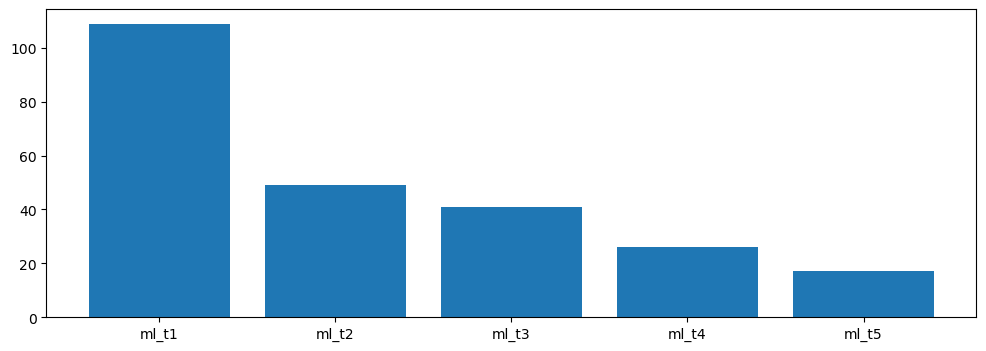

In [201]:
plt.figure(figsize=(12,4))
plt.bar(ml.notnull().sum().index[1:-2], ml.notnull().sum().values[1:-2])
plt.show()

In [202]:
ml_pas_val = ml[ml['situation_ml'] == 'pas_validé']
ml_pas_val

,Clé,ml_t1,ml_t2,ml_t3,ml_t4,ml_t5,ml_max,situation_ml
43,CHIEN-CHOW-CHINEJules,6.0,NaN,NaN,NaN,NaN,6.0,pas_validé
110,GANGNITOCassandre,4.5,8.5,NaN,3.0,7.5,8.5,pas_validé
134,HARDYLouis,8.0,NaN,9.5,NaN,NaN,9.5,pas_validé
138,HERMANTAnaelle,5.0,8.5,7.5,8.5,8.0,8.5,pas_validé
157,LANGLAISAlexis,5.5,NaN,NaN,NaN,NaN,5.5,pas_validé
171,LEKANGA MBOMAAmassa Roland Nathanael,5.0,NaN,NaN,NaN,NaN,5.0,pas_validé
198,MENASSACybele,3.0,NaN,NaN,NaN,3.0,3.0,pas_validé
200,MERCADEREmma,0.0,3.0,3.0,2.0,3.0,3.0,pas_validé
216,PECOURTBertille,5.0,0.0,3.0,0.0,0.0,5.0,pas_validé
231,RAVELOJAONAArthur,3.0,8.0,NaN,7.5,6.0,8.0,pas_validé


# Fonctions Réelles

In [112]:
tables

['t1_ML_2310',
 't2_ML_0411',
 't3_ML_1311',
 't4_ML_1811',
 't5_ML_2511',
 't1_FR_0411',
 't2_FR_1811',
 't3_FR_2511',
 'liste_ml',
 'liste_gen',
 'visu',
 'proj']

In [197]:
tables.index('t1_FR_0411'), tables.index('t3_FR_2511')

(5, 7)

In [208]:
exam1 = pd.read_excel(edl, sheet_name=tables[5])
exam1 = exam1[['Clé', 'Note/20,00']]

exam2 = pd.read_excel(edl, sheet_name=tables[6])
exam2 = exam2[['Clé', 'Note/20,00']]

exam3 = pd.read_excel(edl, sheet_name=tables[7])
exam3 = exam3[['Clé', 'Note/20,00']]

###
# Ajouter un exam ici
###

##### ajouter un exam en fin de liste
liste_exams_fr = [exam1, exam2, exam3]

for x in range(len(liste_exams_fr)):
    liste_exams_fr[x].columns = ['Clé', 'fr_t'+str(x+1)]

fr = liste_gen.merge(exam1,how='left', on='Clé')
fr = fr.merge(exam2,how='left', on='Clé')
fr = fr.merge(exam3,how='left', on='Clé')

cols_fr = list(fr.columns)
cols_fr.pop(0)

def get_max(l):
    if len(l) > 0:
        r = max(l)
    else:
        r = np.NaN
    return r

fr['max_fr'] = [get_max([x for x in [fr.iloc[ligne, j] for j in range(1, len(cols_fr)+1)] if x > 0]) for ligne in range(fr.shape[0])]
fr['situation'] = ['validé' if fr['max_fr'][i] >= 11 else 'pas_validé' for i in range(fr.shape[0])]
fr

,Clé,fr_t1,fr_t2,fr_t3,max_fr,situation
0,ABADIECaroline,NaN,8.0,11.5,11.5,validé
1,ACKERLouis,NaN,14.0,NaN,14.0,validé
2,ALLARTAbigaelle,NaN,NaN,NaN,NaN,pas_validé
3,ALLIZARTLucie,NaN,NaN,NaN,NaN,pas_validé
4,AMORYLucie,NaN,NaN,NaN,NaN,pas_validé
...,...,...,...,...,...,...
278,VINCENTWandrille,NaN,NaN,NaN,NaN,pas_validé
279,VITTABrad,NaN,NaN,12.0,12.0,validé
280,WROLYK-LHERMITTEHugo,NaN,6.5,12.0,12.0,validé
281,ZANG ATANGANAAnais,NaN,14.0,NaN,14.0,validé


In [209]:
fr.situation.value_counts()

situation
validé        190
pas_validé     93
Name: count, dtype: int64